In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import os
% matplotlib inline
plt.ion()

import sys
sys.path.append('../../')
import logomaker

In [2]:
def write_df_and_description(df, description, file_name, index=False, feedback=True):
    """ Write a data frame, with comment, to file"""
    
    # convert description to comment
    comment = '\n'.join(['# %s'%line.strip() for line in description.split('\n')])

    # remove file if it already exists
    if os.path.isfile(file_name):
        os.remove(file_name)        
    
    # open file for appending
    with open(file_name,'a') as f:
        
        # write comment
        f.write(comment+'\n')
        
        # write data frame
        df.to_csv(f, sep='\t', index=index)
    
    # provide feedback if desired
    if feedback:
        # show file name and location
        print('-> saving data to %s:'%file_name)
              
        # preview file
        with open(file_name,'r') as f:
            lines = f.readlines()
            head_length = min(len(lines),15)
            tail_length = min(len(lines),10)
            print(''.join(lines[:head_length]) + '...\n' + ''.join(lines[-tail_length:]))

In [3]:
# Set names of output sequence files
ss_seq_file = '../ss_sequences.txt'
ww_seq_file = '../ww_aligned_sequences.txt'
ars_fgseq_file = '../ars_selected_sequences.txt'
ars_bgseq_file = '../ars_library_sequences.txt'
ars_wtseq_file = '../ars_wt_sequence.txt'
saliency_data_file = '../nn_saliency_values.txt'
crp_sites_file = '../crp_site_sequences.txt'

# Set names of output matrix files
mat_dir = '../../logomaker/examples/matrices/'
ww_mat_file = mat_dir + 'ww_information_matrix.txt'
ss_mat_file = mat_dir + 'ss_probability_matrix.txt'
crp_mat_file = mat_dir + 'crp_energy_matrix.txt'
ars_mat_file = mat_dir + 'ars_enrichment_matrix.txt'
saliency_mat_file = mat_dir + 'nn_saliency_matrix.txt'

In [4]:
### Format saliency data

# write description
description =  """
Saliency values illustrated in Figure 1F.
Data are from Figure 1D of Janganathan et al. (2019), 
and were kindly provided by Kyle Farh and Kishore Jaganathan. 

References:

Jaganathan K et al. Predicting Splicing from Primary Sequence with 
Deep Learning. Cell. 2019 176(3):535–548.e24. 
"""

# load saliency data 
data = np.load('importance_score.npz')
tmp_df = pd.DataFrame(data=data['arr_0'].T, columns=list('ACGT'))

# format saliency data
saliency_data_df = pd.DataFrame()
for i, row in tmp_df.iterrows():
    abs_vals = np.abs(row.values)
    col_num = np.argmax(abs_vals)
    saliency_data_df.loc[i,'character'] = tmp_df.columns[col_num]
    saliency_data_df.loc[i,'value'] = row.iloc[col_num]

# write data and description, then show file
write_df_and_description(df=saliency_data_df, 
                         description=description,
                         file_name=saliency_data_file)

-> saving data to ../nn_saliency_values.txt:
# 
# Saliency values illustrated in Figure 1F.
# Data are from Figure 1D of Janganathan et al. (2019),
# and were kindly provided by Kyle Farh and Kishore Jaganathan.
# 
# References:
# 
# Jaganathan K et al. Predicting Splicing from Primary Sequence with
# Deep Learning. Cell. 2019 176(3):535–548.e24.
# 
character	value
G	-0.0017247200012207031
G	0.03355717658996582
G	0.030026257038116455
G	0.012748241424560547
...
A	-0.004249751567840576
T	0.019003868103027344
A	-0.00032633543014526367
A	-0.010485649108886719
A	0.0017966628074645996
T	0.021005749702453613
T	0.019015133380889893
T	0.010700225830078125
T	0.010440587997436523
C	-0.01064610481262207



In [9]:
### Validate saliency data
with logomaker.open_example_datafile('nn_saliency_values.txt') as f:
    df = pd.read_csv(f, comment='#', sep='\t')
df.head()

Description of example matrix "nn_saliency_values.txt":
# 
# Saliency values illustrated in Figure 1F.
# Data are from Figure 1D of Janganathan et al. (2019),
# and were kindly provided by Kyle Farh and Kishore Jaganathan.
# 
# References:
# 
# Jaganathan K et al. Predicting Splicing from Primary Sequence with
# Deep Learning. Cell. 2019 176(3):535–548.e24.
# 



,character,value
0,G,-0.001725
1,G,0.033557
2,G,0.030026
3,G,0.012748
4,G,0.000337


In [10]:
### Compute saliency matrix

description = """
Saliency matrix illustrated in Figure 1F.
Data are from Figure 1D of Janganathan et al. (2019), 
and were kindly provided by Kyle Farh and Kishore Jaganathan. 

References:

Jaganathan K et al. Predicting Splicing from Primary Sequence with 
Deep Learning. Cell. 2019 176(3):535–548.e24. 
"""

# THIS SHOULD WORK, BUT DOESN'T!
#saliency_mat_df = logomaker.saliency_to_matrix(seq=saliency_data_df['character'], 
#                                               values=saliency_data_df['value'])

# This is more complicated than it needs to be
saliency_mat_df = logomaker.saliency_to_matrix(seq=''.join(saliency_data_df['character']),
                                               values=list(saliency_data_df['value']))

# write data and description, then show file
write_df_and_description(df=saliency_mat_df, 
                         description=description,
                         file_name=saliency_mat_file,
                         index=True)

-> saving data to ../../logomaker/examples/matrices/nn_saliency_matrix.txt:
# 
# Saliency matrix illustrated in Figure 1F.
# Data are from Figure 1D of Janganathan et al. (2019),
# and were kindly provided by Kyle Farh and Kishore Jaganathan.
# 
# References:
# 
# Jaganathan K et al. Predicting Splicing from Primary Sequence with
# Deep Learning. Cell. 2019 176(3):535–548.e24.
# 
pos	A	C	G	T
0	-0.0	-0.0	-0.0017247200012207031	-0.0
1	0.0	0.0	0.03355717658996582	0.0
2	0.0	0.0	0.030026257038116455	0.0
3	0.0	0.0	0.012748241424560547	0.0
...
119	-0.004249751567840576	-0.0	-0.0	-0.0
120	0.0	0.0	0.0	0.019003868103027344
121	-0.00032633543014526367	-0.0	-0.0	-0.0
122	-0.010485649108886719	-0.0	-0.0	-0.0
123	0.0017966628074645996	0.0	0.0	0.0
124	0.0	0.0	0.0	0.021005749702453613
125	0.0	0.0	0.0	0.019015133380889893
126	0.0	0.0	0.0	0.010700225830078125
127	0.0	0.0	0.0	0.010440587997436523
128	-0.0	-0.01064610481262207	-0.0	-0.0



Description of example matrix "nn_saliency_matrix":
# 
# Saliency matrix illustrated in Figure 1F.
# Data are from Figure 1D of Janganathan et al. (2019),
# and were kindly provided by Kyle Farh and Kishore Jaganathan.
# 
# References:
# 
# Jaganathan K et al. Predicting Splicing from Primary Sequence with
# Deep Learning. Cell. 2019 176(3):535–548.e24.
# 



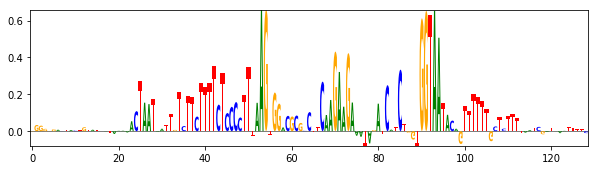

In [11]:
# Validate saliency matrix
df = logomaker.get_example_matrix('nn_saliency_matrix')
logomaker.Logo(df)

In [13]:
### Format CRP sites data

# load crp sites, taken from RegulonDB
with open('crp_sites.fasta','r') as f:
    lines = f.readlines()
    info = [line.strip() for line in lines if '>' in line]
    seqs = [line.strip() for line in lines if '>' not in line]
    
# clean information
info = ['_'.join(line.split()[1:]) for line in info]
    
# create crp sites dataframe
crp_sites_df = pd.DataFrame()
crp_sites_df['sequence'] = seqs
crp_sites_df['location'] = info

# save list of sites as data frame
crp_sites_df.to_csv(crp_sites_file, sep='\t', index=False)
print('# CRP binding sites saved to %s:'%crp_sites_file)
!head $crp_sites_file

# CRP binding sites saved to ../crp_site_sequences.txt:
sequence	location
ATAAGCAGGATTTAGCTCACACTTAT	caiFp_-41.5
AAAAATGTGATACCAATCACAGAATA	caiTp_-41.5
ATATTGGTGATCCATAAAACAATATT	fixAp_-126.5
ATATTGGTGAGGAACTTAACAATATT	fixAp_-69.5
GATTATTTGCACGGCGTCACACTTTG	araBp_-93.5
CAAAGTGTGACGCCGTGCAAATAATC	araCp_-72.5
CTTTCTTCGTAACGCCTCGCAAATTT	ppdDp_20.5
TTATATGTGGTGCTAATACCCGGTTC	nadCp_-45.5
GAACCGGGTATTAGCACCACATATAA	ampD_6.5


In [14]:
### Format CRP energy matrix

# load published energy matrix
energy_df = pd.read_csv('crp_tau_final_all.26.txt', delim_whitespace=True, index_col=0)
energy_df.columns = [c[-1] for c in energy_df.columns]
energy_df = logomaker.transform_matrix(energy_df, center_values=True)
energy_df = energy_df/1.62   # convert to kcal/mol

# save energy matrix
energy_df.to_csv(crp_mat_file, sep='\t')
print('# CRP energy matrix saved to %s:'%crp_mat_file)
!head $crp_mat_file

# CRP energy matrix saved to ../../logomaker/examples/matrices/crp_energy_matrix.txt:
pos	A	C	G	T
0	-0.18364197530864196	0.15586419753086422	0.09413580246913582	-0.06635802469135801
1	-0.29012345679012347	0.2777777777777778	0.1111111111111111	-0.09876543209876544
2	-0.2762345679012346	0.316358024691358	0.16820987654320985	-0.20833333333333334
3	-0.22685185185185186	0.2854938271604938	0.2978395061728395	-0.35648148148148145
4	-0.0601851851851852	0.1435185185185185	0.05709876543209874	-0.1404320987654321
5	0.29475308641975306	-0.16820987654320985	0.48611111111111116	-0.6126543209876543
6	0.17901234567901236	0.6172839506172839	-0.8518518518518517	0.0555555555555556
7	0.033950617283950574	0.21296296296296294	0.324074074074074	-0.5709876543209876
8	0.44444444444444425	0.5925925925925926	-1.1172839506172838	0.08024691358024684


In [15]:
### Format WW domain sequences

# load alignment of WW domain proteins
in_file = 'Pfam_wwdomain.fa'
with open(in_file, 'r') as f:
    text = f.read()
    lines = text.split('\n')
    seqs = [l.strip().upper() for l in lines if '#' not in l and '>' not in l and len(l.strip())>0]
    
ww_seqs_df = pd.DataFrame()
ww_seqs_df['sequence'] = seqs

ww_seqs_df.to_csv(ww_seq_file, sep='\t', index=False)
print('# WW domain sequences saved to %s:'%ww_seq_file)
!head $ww_seq_file

# WW domain sequences saved to ../ww_aligned_sequences.txt:
sequence
LPPQW..TEA.VDVDT...GKFYFVHVET.......KETRWERP
--PGW..TAT.VDPAS...GRTYYYHAAT.......GETRWEPP
LPSGW..VEQ.TDPSS...GRPYYYHNAS.......NLTQWERP
LPAGW..VAA.NDPSS...GRTYYYHAES.......GVTSWNPP
LPNGW..QEL.VDPSS...GSTYYYNEVN.......GTTSWDRP
LPEGW..VEL.VHESS...GKTYYFHAED.......NVTSWEQP
LPQGW..IEA.VDPST...EATYYINEVE.......GITSWERP
LPPGW..AKL.THPDS...GDAYYYNEAT.......NATSWDIP
--TGW..EAL.VDEAS...GAIYYYNKLD.......GTSSWERP


In [16]:
### Save WW domain information matrix
    
# create counts matrix
ww_counts_df = logomaker.alignment_to_matrix(ww_seqs_df['sequence'], characters_to_ignore='.-X')

# filter base on counts
num_seqs = ww_counts_df.sum(axis=1)
pos_to_keep = num_seqs > len(seqs)/2
ww_counts_df = ww_counts_df[pos_to_keep]
ww_counts_df.reset_index(drop=True, inplace=True)

# transform to information matrix
ww_info_df = logomaker.transform_matrix(ww_counts_df, from_type='counts', to_type='information')

# save file
ww_info_df.to_csv(ww_mat_file, sep='\t')
print('WW domain matrix computed and saved to %s.'%ww_mat_file)
!head $ww_mat_file

WW domain matrix computed and saved to ../../logomaker/examples/matrices/ww_information_matrix.txt.
pos	A	C	D	E	F	G	H	I	K	L	M	N	P	Q	R	S	T	V	W	Y
0	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	4.013829754302133	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.06843563815820448	0.001591526468795453	0.001591526468795453
1	0.03497481914499014	0.0013989927657996053	0.0013989927657996053	0.020984891486994083	0.006994963828998028	0.012590934892196452	0.013989927657996056	0.0013989927657996053	0.006994963828998028	0.012590934892196452	0.0013989927657996053	0.012590934892196452	3.710128814900554	0.022383884252793685	0.004196978297398817	0.013989927657996056	0.004196978297398817	0.0027979855315992106	0.0013989927657996053	0.0013989927657996053
2	0.103247138

In [17]:
### Format 5' ss sequences

# load all splice sites
tmp1_df = pd.read_csv('hg38_sss.txt', sep='\t', index_col=0)

# get 5' splice sites
seqs = [s.replace('T','U') for s in tmp1_df['ss5_seq'] if s[3:5] in {'GT','GU'}]
tmp2_df = pd.DataFrame(data=seqs, columns=['sequence'])

# uniquify sequence list
tmp2_df['count'] = 1
ss_seqs_df = tmp2_df.groupby('sequence').sum()
ss_seqs_df.sort_values(by='count', ascending=False, inplace=True)
ss_seqs_df.reset_index(inplace=True)

# save file
ss_seqs_df.to_csv(ss_seq_file, sep='\t', index=False)
print('5\'ss sequences saved to %s.'%ss_seq_file)
!head $ss_seq_file

5'ss sequences saved to ../ss_sequences.txt.
sequence	count
CAGGUGAGU	3729
CAGGUGAGG	3653
CAGGUGAGC	3090
CAGGUAAGA	2856
AAGGUAAGA	2740
AAGGUGAGU	2697
GAGGUGAGU	2570
CAGGUAAGG	2470
AAGGUAAGU	2374


In [18]:
### Generate 5'ss motif

# compute probability matrix from sequence alignment
prob_df = logomaker.alignment_to_matrix(sequences=ss_seqs_df['sequence'], 
                                        counts=ss_seqs_df['count'], 
                                        to_type='probability', 
                                        pseudocount=0)

# save file
prob_df.to_csv(ss_mat_file, sep='\t')
print('5\'ss probability matrix computed and saved to %s.'%ss_mat_file)
!head $ss_mat_file

5'ss probability matrix computed and saved to ../../logomaker/examples/matrices/ss_probability_matrix.txt.
pos	A	C	G	U
0	0.3257847108506421	0.3598931310867879	0.1883478410755839	0.12597431698698613
1	0.6302921658191847	0.1096785314142894	0.12005515814875463	0.13997414461777127
2	0.1011945186589675	0.02727225717486857	0.7991933120744635	0.07233991209170042
3	0.0	0.0	1.0	0.0
4	0.0	0.0	0.0	1.0
5	0.5740239593208653	0.03417392053779195	0.35520813582694133	0.036593984314401445
6	0.6734534172196845	0.0831681461690942	0.12562268378867533	0.1177557528225459
7	0.09120744635008189	0.06308368525381368	0.7633474101525468	0.08236145824355771
8	0.17799189864690165	0.15584590192191675	0.19268465052141687	0.47347754890976473


Description of example matrix "ss_probability_matrix":



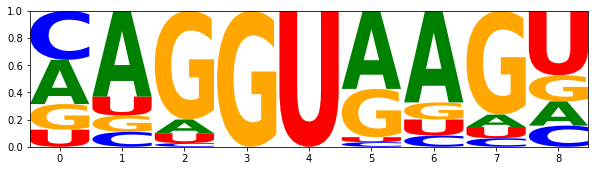

In [20]:
### Validate ss matrix
df = logomaker.get_example_matrix('ss_probability_matrix')
logomaker.Logo(df)

In [ ]:
def get_probmat_from_alngz_file(file_name):
    with gzip.open(file_name, 'r') as f:
        txt = [x.decode("utf-8") for x in f]
    
    counts = np.array([int(str(name).strip().split('-')[-1]) for name in txt if '>' in name])
    seqs = [str(s).strip() for s in txt if '>' not in s]
    
    mat = logomaker.alignment_to_matrix(sequences=seqs, 
                                        counts=counts, 
                                        to_type='probability')
    return mat

bg_file = 'data/ARS416_09_B1.qcfilt.aln.full.gz'
fg_file = 'data/ARS416_09_B2.qcfilt.aln.full.gz'

bg_df = get_probmat_from_alngz_file(bg_file)
fg_df = get_probmat_from_alngz_file(fg_file)

enrichment_df = np.log2(fg_df/bg_df)
enrichment_df = logomaker.transform_matrix(enrichment_df, center_values=True)
enrichment_df.loc[:,:] = enrichment_df.values[::-1,::-1]

# show enrichment matrix
logomaker.Logo(enrichment_df)

# save file
enrichment_df.to_csv(ars_mat_file, sep='\t')
print('ARS enrichment matrix computed and saved to %s.'%ars_mat_file)

In [ ]:
def rc(seq):
    """Reverse-complements a DNA sequence"""
    complement = str.maketrans('ATCGN', 'TAGCN')
    return str(seq).upper().translate(complement)[::-1]

# write ars416 seq to file
ars416 = rc(
    'tctaacaaaatagcaaatttcgtcaaaaatgctaagaaataggtt'
    'attactgagtagtatttatttaagtattgtttgtgcacttgcctg'
    'caggccttttgaaaagcaagcataaaagatctaaacataaaatct'
    'gtaaaataacaagat'.upper())
with open('matrices/ars416.txt','w') as f:
    f.write(ars416)